In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [7]:
train_data_dir = '/content/training_set/training_set'
img_width, img_height = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_augmented = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)


train_datagen_no_aug = ImageDataGenerator(rescale=1./255)
train_generator_no_aug = train_datagen_no_aug.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 8005 images belonging to 2 classes.


In [8]:
def build_cnn():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


model_augmented = build_cnn()
history_augmented = model_augmented.fit(
    train_generator_augmented,
    epochs=10
)

model_no_aug = build_cnn()
history_no_aug = model_no_aug.fit(
    train_generator_no_aug,
    epochs=10
)


Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 56s 211ms/step - accuracy: 0.5061 - loss: 0.7405
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 80s 206ms/step - accuracy: 0.6087 - loss: 0.6600
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.6716 - loss: 0.6057
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 206ms/step - accuracy: 0.6974 - loss: 0.5726
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.7155 - loss: 0.5495
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.7218 - loss: 0.5420
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 82s 204ms/step - accuracy: 0.7297 - loss: 0.5273
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 207ms/step - accuracy: 0.7456 - loss: 0.5061
Epoch 9/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step - accuracy: 0.7732 - loss: 0.4772
Epoch 10/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 213ms/step - accuracy: 0.7673 - loss: 0.4834
Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.5572 - loss: 0.7313
Epoch 2/10
251/251 ━━

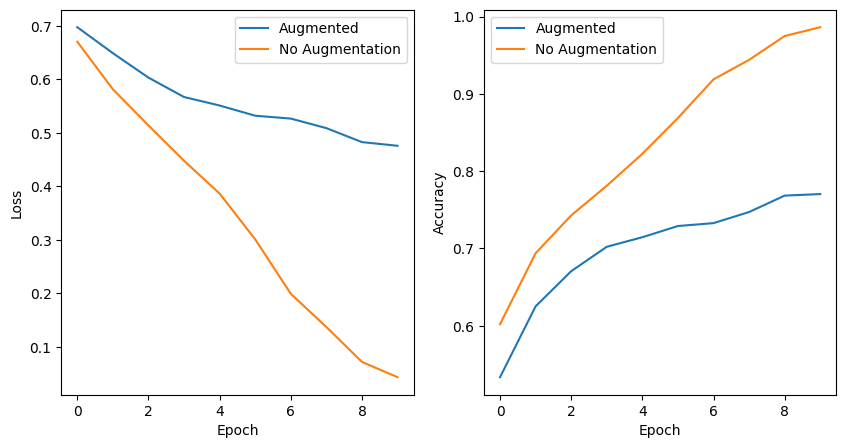

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['loss'], label='Augmented')
plt.plot(history_no_aug.history['loss'], label='No Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['accuracy'], label='Augmented')
plt.plot(history_no_aug.history['accuracy'], label='No Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()